# 8. Seaborn数据可视化

常用的 Python 画图工具有 matplotlib 和 seaborn，其中，seaborn 诞生地较晚，与 Pandas 结合更紧密，使用起来也更加方便，因此是首推的画图工具。

## 8.1 频次直方图、KDE和密度图

在对统计数据进行可视化时，通常首先想到的就是频次直方图和多变量的联合分布图。

In [7]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sns.set()

/Users/huanglan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/huanglan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


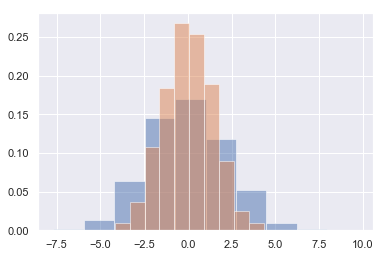

In [8]:
data = np.random.multivariate_normal([0,0],[[5,2], [2,2]], size = 2000)
data = pd.DataFrame(data, columns=['x','y'])

for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

In [86]:
iris = sns.load_dataset('iris')
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

/Users/huanglan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/huanglan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/huanglan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


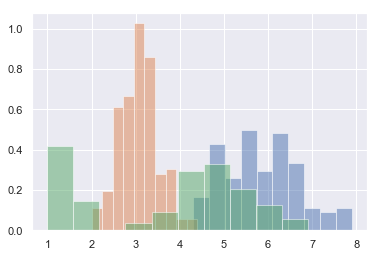

In [25]:
# for col in iris.columns:
for col in ['sepal_length', 'sepal_width', 'petal_length']:
    plt.hist(iris[col], normed=True, alpha=0.5)

KDE（kernel density estimation）核密度估计图是在概率论中用来估计分布的密度函数。distplot() 方法会画出直方图与KDE图的结合图。

/Users/huanglan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


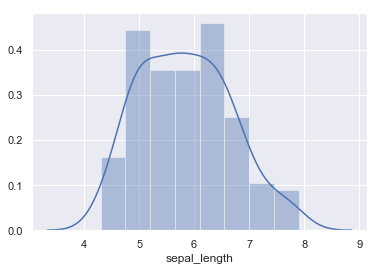

In [12]:
sns.distplot(iris['sepal_length'])

/Users/huanglan/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


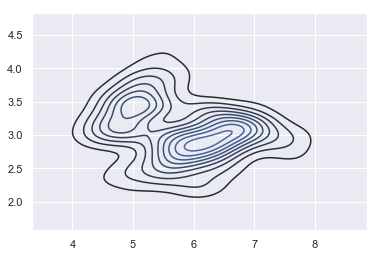

In [34]:
# 删除取值为标称值的class列
iris_woclass = iris.drop('species', axis=1)
#iris_woclass.describe()
sns.kdeplot(iris_woclass);

两个变量的联合分布图

/Users/huanglan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


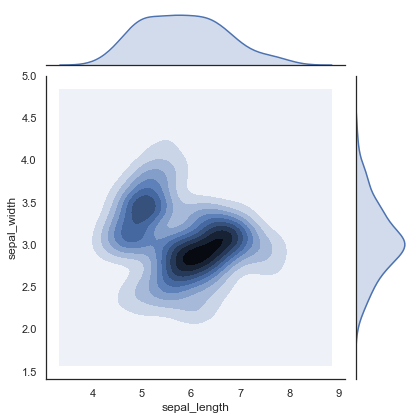

In [36]:
with sns.axes_style('white'):
    sns.jointplot('sepal_length', 'sepal_width', iris, kind='kde')

在对多维数据进行可视化时，矩阵图（pair plot）是非常有用的工具，它可以画出任意两个变量之间的关联分布。

/Users/huanglan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Users/huanglan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


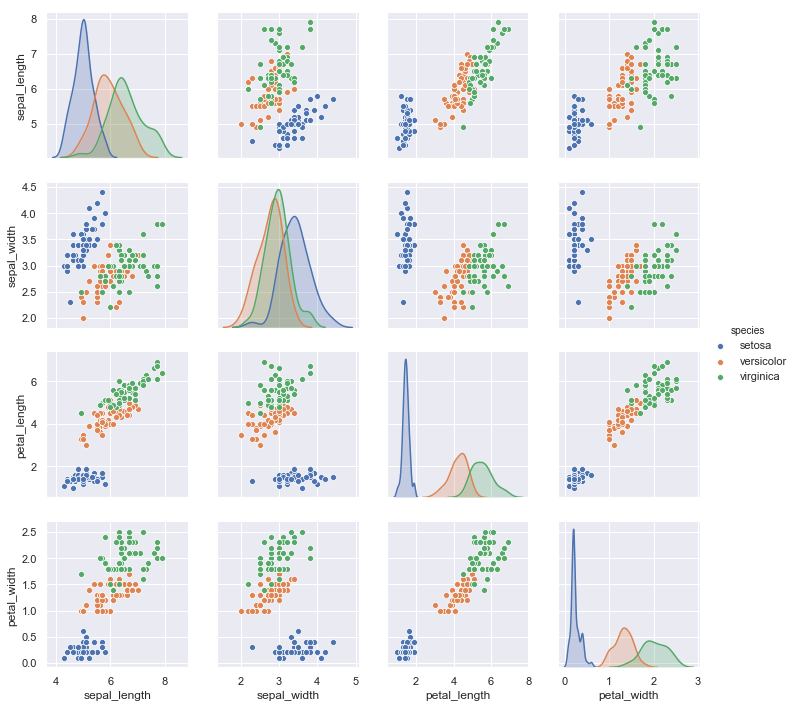

In [38]:
sns.pairplot(iris, hue='species', size=2.5)

分面频次直方图

对数据进行分组后再进行统计和可视化，是非常常用的数据分析手段，Seaborn 提供了 FacetGrid 函数让分组直方图变得非常简单。下面用服务员收小费的数据集来演示。

In [54]:
tips = sns.load_dataset('tips')
tips['day'].unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

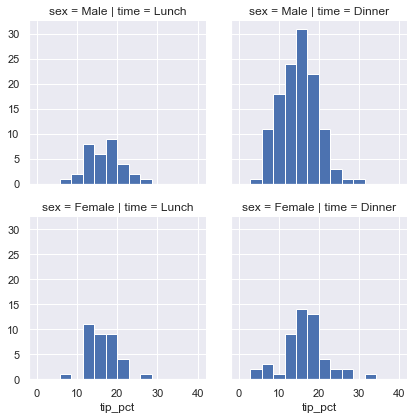

In [46]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row='sex', col = 'time', margin_titles=True)
grid.map(plt.hist, 'tip_pct', bins=np.linspace(0, 40, 15))

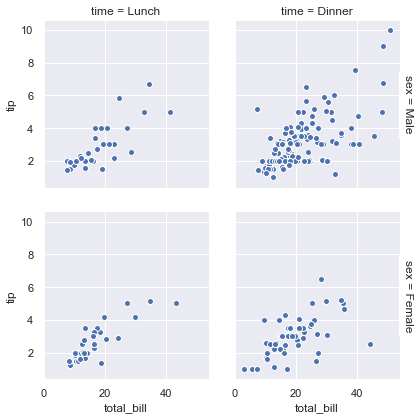

In [48]:
# 每次都要重新定义 grid
grid = sns.FacetGrid(tips, row='sex', col = 'time', margin_titles=True)
grid.map(plt.scatter, 'total_bill', 'tip', edgecolor='w')

因子图（factor plot）也是对数据子集进行可视化的方法，通过它可以观察一个参数在另一个参数间隔中的分布情况。

/Users/huanglan/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


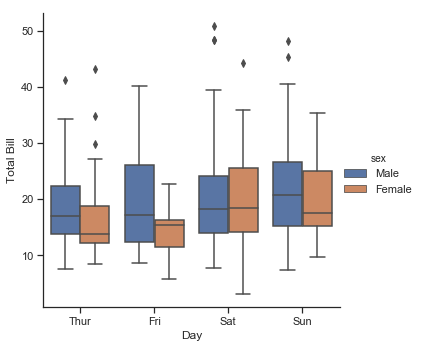

In [49]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot('day', 'total_bill', 'sex', data=tips, kind='box')
    g.set_axis_labels('Day', 'Total Bill')

联合分布

/Users/huanglan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


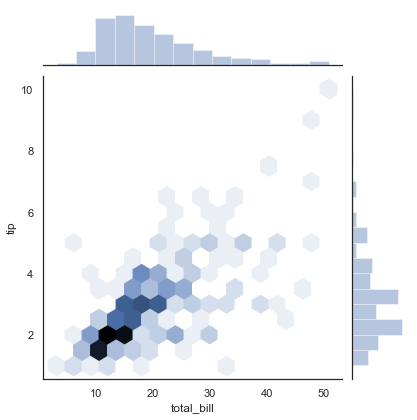

In [55]:
with sns.axes_style('white'):
    sns.jointplot('total_bill', 'tip', data=tips, kind='hex')

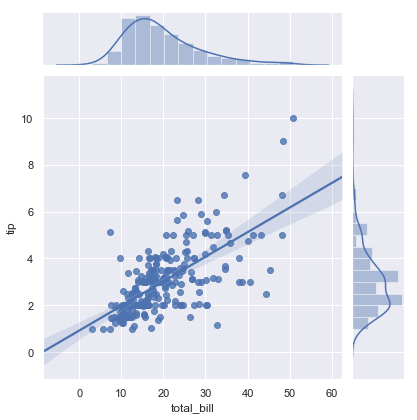

In [56]:
sns.jointplot('total_bill', 'tip', data=tips, kind='reg')

条形图

In [72]:
planets = sns.load_dataset('planets')
planets['method'].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

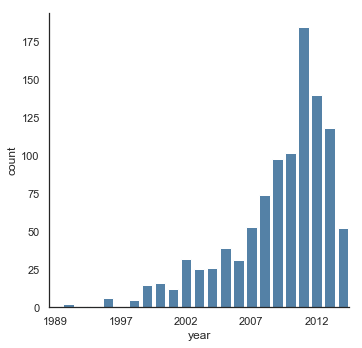

In [66]:
with sns.axes_style('white'):
    g = sns.catplot('year', data=planets, aspect=1, kind='count', color='steelblue')
    g.set_xticklabels(step=5)

对比不同方法（method参数）发现行星的数量

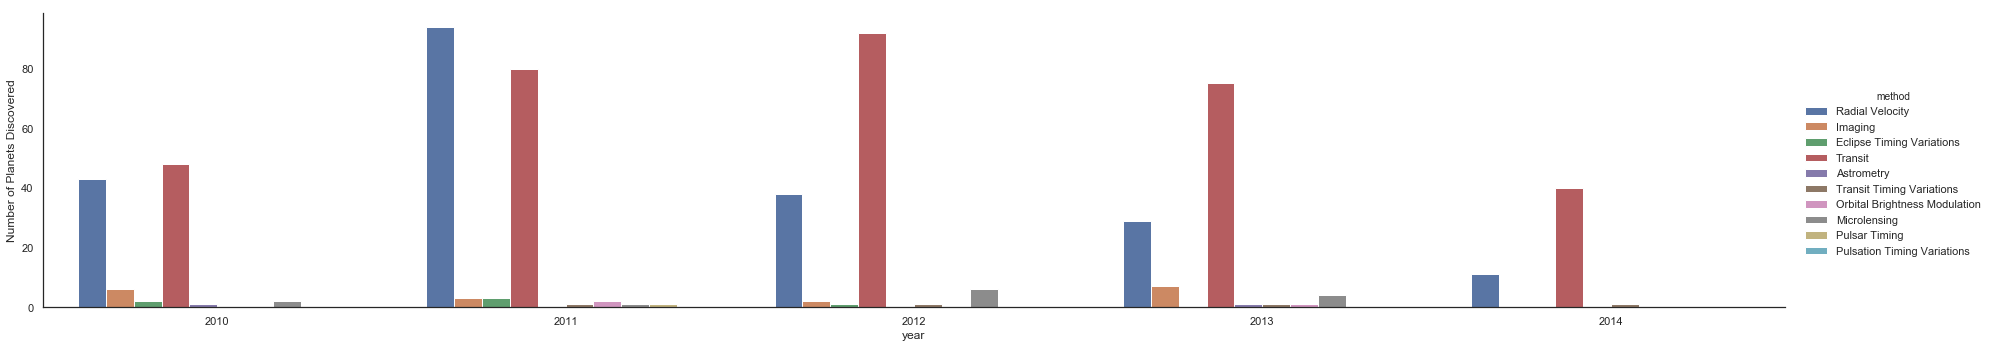

In [81]:
with sns.axes_style('white'):
    g = sns.catplot('year', data=planets, 
                    aspect = 5, kind='count', hue='method', order=range(2010,2015))
    g.set_ylabels('Number of Planets Discovered')

对比两种主要的方法所发现的行星数量：

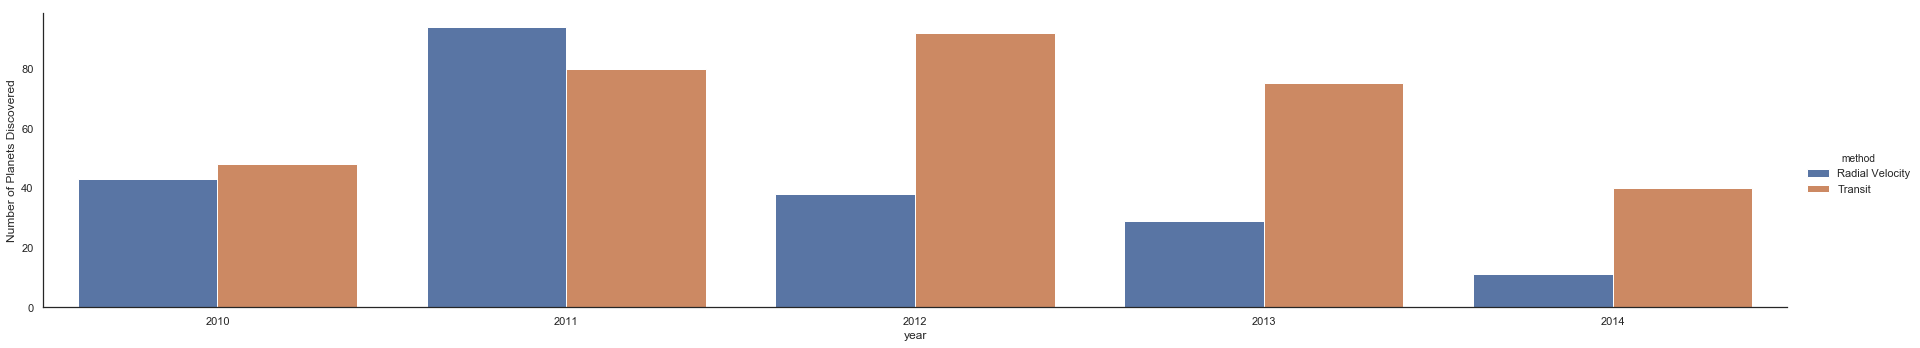

In [82]:
with sns.axes_style('white'):
    g = sns.catplot('year', data=planets[(planets['method']=='Radial Velocity') | (planets['method']=='Transit')], 
                    aspect = 5, kind='count', hue='method', order=range(2010,2015))
    g.set_ylabels('Number of Planets Discovered')

【案例】马拉松比赛成绩数据

In [96]:
data = pd.read_csv('marathon-data.csv')
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [98]:
# 把成绩数据转换成 timedelta对象
from datetime import timedelta

def convert_time(s):
    h,m,s = map(int, s.split(':'))
    return timedelta(hours=h, minutes=m, seconds=s)

data=pd.read_csv('marathon-data.csv', converters={'split':convert_time, 'final':convert_time})
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [100]:
# 将时间换算成秒

data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


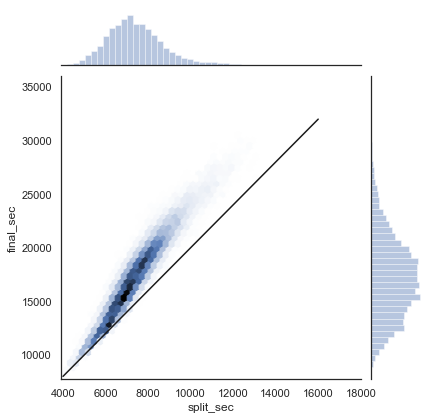

In [109]:
with sns.axes_style('white'):
    g=sns.jointplot('split_sec', 'final_sec', data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000), 
                   np.linspace(8000, 32000), 'k')

/Users/huanglan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


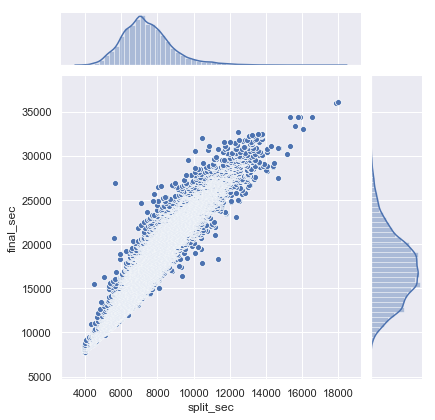

In [112]:
g = sns.JointGrid(x='split_sec', y='final_sec', data=data)
g = g.plot(sns.scatterplot, sns.distplot)
# sns.regplot, sns.distplo

In [113]:
# 创建一列来表示前后半程的差异
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()
# 如果该值小于零，说明这个人是后半程加速型选手

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842


/Users/huanglan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


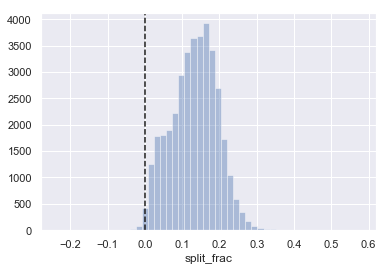

In [117]:
sns.distplot(data.split_frac, kde=False);
plt.axvline(0, color='k', linestyle='--')

In [116]:
sum(data.split_frac < 0)

251

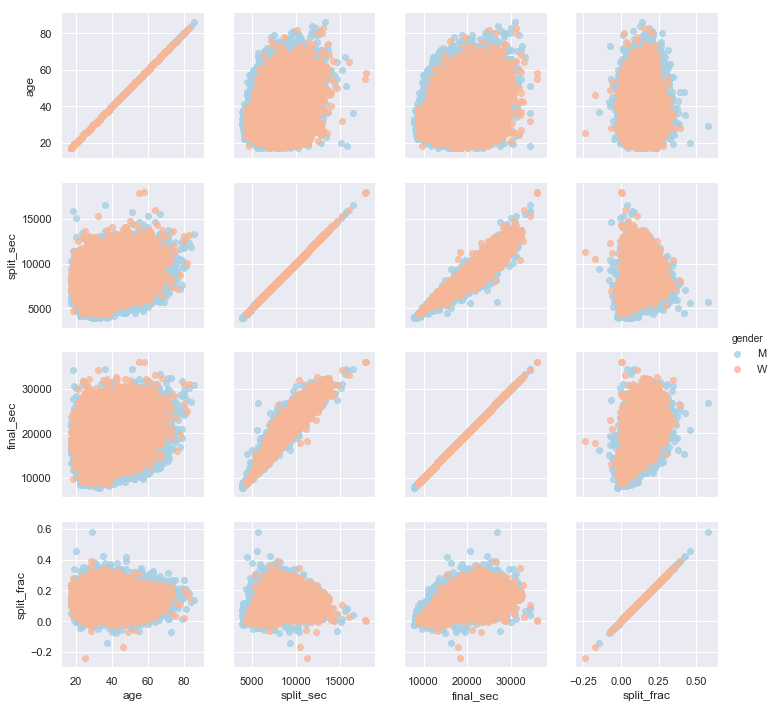

In [118]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'], hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha = 0.8)
g.add_legend();

/Users/huanglan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'split_frac')

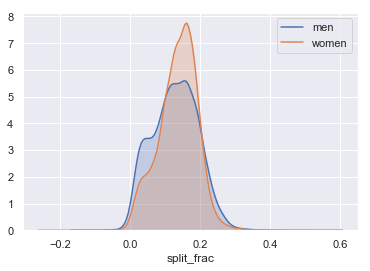

In [119]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac')

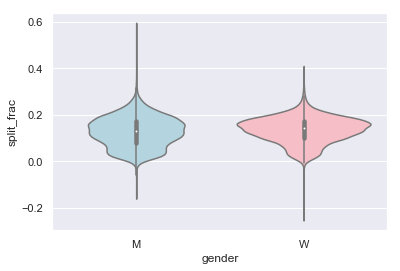

In [120]:
sns.violinplot('gender', 'split_frac', data=data, 
              palette=['lightblue', 'lightpink'])

In [122]:
data['age_dec'] = data.age.map(lambda age: 10 * (age//10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097,30
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842,30


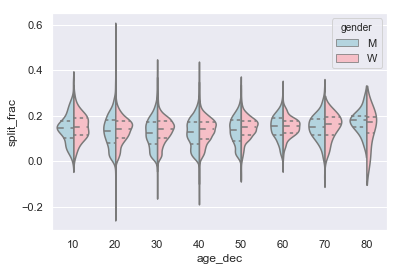

In [124]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot('age_dec', 'split_frac', hue='gender', data=data,
                  split=True, inner='quartile', palette=['lightblue', 'lightpink']);

Text(388.5009040777125, 0.5, 'split_frac')

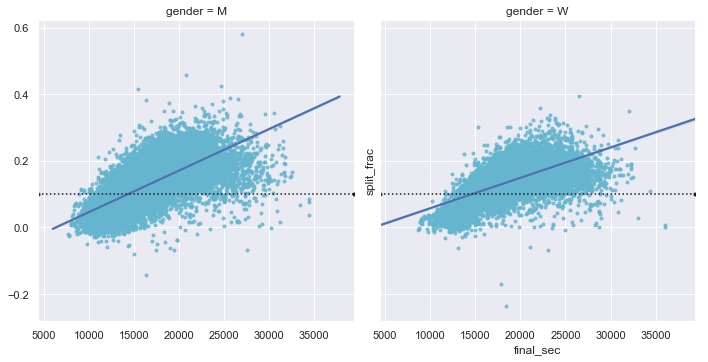

In [133]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data, markers='.', scatter_kws = dict(color='c'))
g.map(plt.axhline, y=0.1, color='k', ls=':')
plt.xlabel('final_sec')
plt.ylabel('split_frac')